In [175]:
# https://towardsdatascience.com/make-your-inventory-simulation-in-python-9cb950da8cf3


import numpy as np
time = 100
d_mu = 100
d_std = 25
d = np.maximum(np.random.normal(d_mu, d_std, time).round(0).astype(int),0)

In [176]:
from scipy.stats import norm
L, R, alpha = 4, 1, 0.95 
z = norm.ppf(alpha) 
x_std = np.sqrt(L+R)*d_std

In [177]:
Ss = np.round(x_std*z).astype(int) 
Cs = 1/2 * d_mu * R 
Is = d_mu * L 
S = Ss + 2*Cs + Is

In [178]:
hand = np.zeros(time, dtype=int) 
transit = np.zeros((time,L+1), dtype=int)

In [179]:
stockout_period = np.full(time, False, dtype=bool)
stockout_cycle = []

In [180]:
S

592.0

In [181]:
d[0]

73

In [182]:
hand[0] = S - d[0]
transit[1,-1] = d[0]

In [183]:
for t in range(1,time): 
  if transit[t-1,0]>0: 
    stockout_cycle.append(stockout_period[t-1]) 
  hand[t] = hand[t-1] - d[t] + transit[t-1,0] 
  stockout_period[t] = hand[t] < 0
  transit[t,:-1] = transit[t-1,1:]
  if 0==t%R: 
    net = hand[t] + transit[t].sum() 
    transit[t,L] = S - net

    Demand  On−hand                In−transit
5      114       -5  [100, 153, 95, 135, 114]
6       90        5   [153, 95, 135, 114, 90]
7       84       74    [95, 135, 114, 90, 84]
8      105       64   [135, 114, 90, 84, 105]
9      119       80   [114, 90, 84, 105, 119]
..     ...      ...                       ...
95     114       85   [87, 123, 105, 78, 114]
96      99       73   [123, 105, 78, 114, 99]
97      81      115    [105, 78, 114, 99, 81]
98     122       98    [78, 114, 99, 81, 122]
99      94       82    [114, 99, 81, 122, 94]

[95 rows x 3 columns]


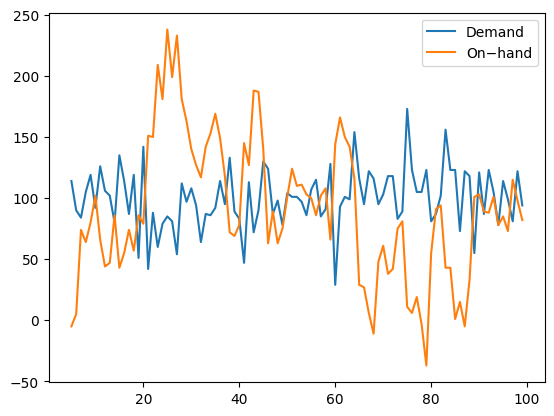

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data= {'Demand':d, 'On−hand':hand, 'In−transit':list(transit)}) 
df = df.iloc[R+L:,:] #Remove initialization periods 
print(df)

df.plot()
#plt.axhline(y = 96.8, color = 'r', linestyle = '-')
plt.show()

In [185]:
print('Alpha:',alpha*100)
SL_alpha = 1-sum(stockout_cycle)/len(stockout_cycle)
print('Cycle Service Level:', round(SL_alpha*100,1))
SL_period = 1-sum(stockout_period)/time
print('Period Service Level:', round(SL_period*100,1))

Alpha: 95.0
Cycle Service Level: 94.7
Period Service Level: 95.0
